<a href="https://colab.research.google.com/github/ibrahimba9/pytorch_practice/blob/main/ANN_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import sys,tempfile
import urllib.request
import os
import seaborn as sns

In [ ]:
BASE_DIR = "/tmp"
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn.csv')

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/Majd0507/Deep-Learning/master/Volume%201%20-%20Supervised%20Deep%20Learning/Part%201%20-%20Artificial%20Neural%20Networks%20(ANN)/Artificial_Neural_Networks/Churn_Modelling.csv", OUTPUT_FILE)

('/tmp/churn.csv', <http.client.HTTPMessage at 0x7fb3edb12310>)

In [ ]:
df = pd.read_csv("/tmp/churn.csv")

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


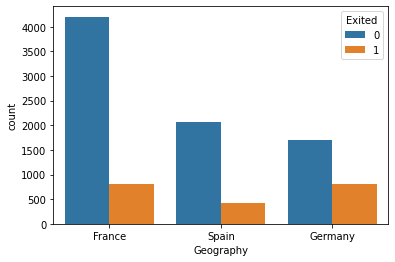

In [ ]:
sns.countplot(data=df, x="Geography", hue="Exited")

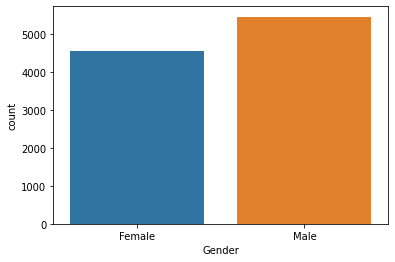

In [ ]:
sns.countplot(data=df, x="Gender")

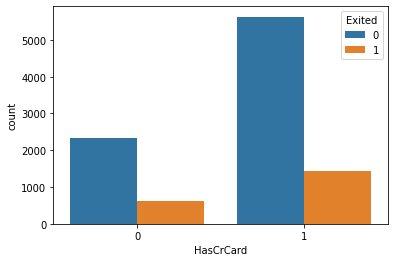

In [ ]:
sns.countplot(data=df, x="HasCrCard", hue="Exited")

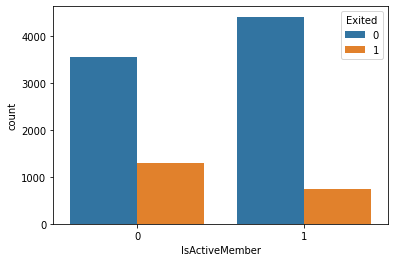

In [ ]:
sns.countplot(data=df, x="IsActiveMember", hue="Exited")

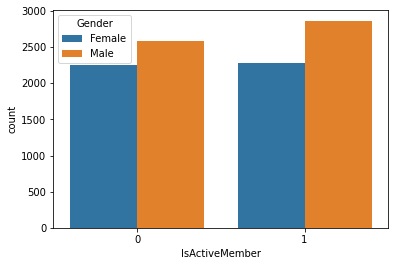

In [ ]:
sns.countplot(data=df, x="IsActiveMember", hue="Gender")

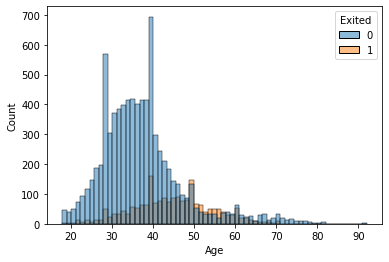

In [ ]:
sns.histplot(data=df, x="Age", hue="Exited")

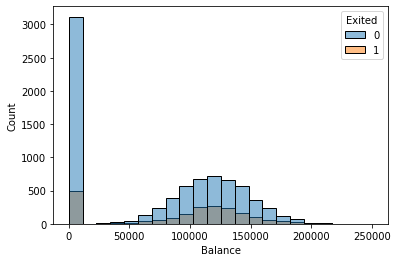

In [ ]:
sns.histplot(data=df, x="Balance", hue="Exited")

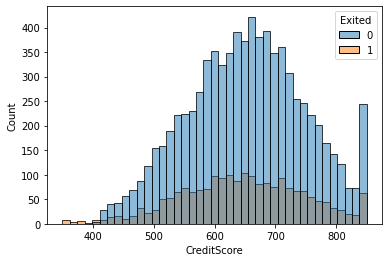

In [ ]:
sns.histplot(data=df, x="CreditScore", hue="Exited")

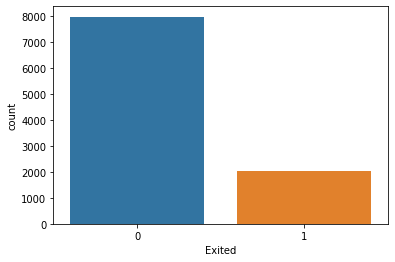

In [ ]:
sns.countplot(data=df, x="Exited")

In [ ]:
(df[df.Exited == 1].Exited.sum() / len(df))*100

20.369999999999997

In [ ]:
np.int32(df.Gender=="Male")

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
df['Gender'] = np.int32(df.Gender=="Male")

In [ ]:
geography_labels = pd.get_dummies(df[["Geography"]], prefix="Geography_", drop_first="True")
geography_labels

,Geography__Germany,Geography__Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(9), object(2)
memory usage: 1.0+ MB


In [ ]:
df = pd.concat([df.drop(columns=["RowNumber", "CustomerId", "Surname", "Geography"]), geography_labels], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Gender              10000 non-null  int32  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Geography__Germany  10000 non-null  uint8  
 11  Geography__Spain    10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(7), uint8(2)
memory usage: 761.8 KB


In [ ]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography__Germany,Geography__Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [ ]:
sc = StandardScaler()
df[["Balance"]] = sc.fit_transform(df[["Balance"]])
sc = StandardScaler()
df[["EstimatedSalary"]] = sc.fit_transform(df[["EstimatedSalary"]])
sc = StandardScaler()
df[["CreditScore"]] = sc.fit_transform(df[["CreditScore"]])

In [ ]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography__Germany,Geography__Spain
0,-0.326221,0,42,2,-1.225848,1,1,1,0.021886,1,0,0
1,-0.440036,0,41,1,0.117350,1,0,1,0.216534,0,0,1
2,-1.536794,0,42,8,1.333053,3,1,0,0.240687,1,0,0
3,0.501521,0,39,1,-1.225848,2,0,0,-0.108918,0,0,0
4,2.063884,0,43,2,0.785728,1,1,1,-0.365276,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,39,5,-1.225848,2,1,0,-0.066419,0,0,0
9996,-1.391939,1,35,10,-0.306379,1,1,1,0.027988,0,0,0
9997,0.604988,0,36,7,-1.225848,1,0,1,-1.008643,1,0,0
9998,1.256835,1,42,3,-0.022608,2,1,0,-0.125231,1,1,0


In [ ]:
X, Y = df.drop(columns=["Exited"]).to_numpy(), df[["Exited"]].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=12, stratify=Y)

In [ ]:
print(X_train.shape)
print(y_test.shape)

(7500, 11)
(2500, 1)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
class MyDataset(Dataset):
  def __init__(self, samples, labels):
    self.samples = samples
    self.labels = labels
  
  def __len__(self):
    return len(self.samples)
  
  def __getitem__(self, index):
    return self.samples[index], self.labels[index]

In [ ]:
input_size = X.shape[1]
hidden_size = 100
num_classes = 2
num_epoch = 50
batch_size = 100
learning_rate = 0.001

In [ ]:
train_loader = DataLoader(dataset=MyDataset(X_train, y_train), batch_size=batch_size, num_workers=2)
test_loader = DataLoader(dataset=MyDataset(X_test, y_test), batch_size=batch_size, num_workers=2)

In [ ]:
example = iter(train_loader)
samples, labels = example.next()
print(samples.shape, labels.shape)

torch.Size([100, 11]) torch.Size([100, 1])


In [ ]:
class NeuralNetChurn(nn.Module):
  def __init__(self, input_size):
    super(NeuralNetChurn, self).__init__()
    self.l1 = nn.Linear(in_features=input_size, out_features=20)
    self.relu1 = nn.ReLU()
    self.l2 = nn.Linear(in_features=20, out_features=60)
    self.relu2 = nn.ReLU()
    self.l3 = nn.Linear(in_features=60, out_features=30)
    self.relu3 = nn.ReLU()
    self.l4 = nn.Linear(in_features=30, out_features=1)
  
  def forward(self, x):
    out = self.l1(x)
    out = self.relu1(out)
    out = self.l2(out)
    out = self.relu2(out)
    out = self.l3(out)
    out = self.relu3(out)
    out = self.l4(out)
    y_pred = torch.sigmoid(out)
    return y_pred

In [ ]:
model = NeuralNetChurn(input_size=input_size)
model = model.to(device)

In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(params=model.parameters(), lr=learning_rate)

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epoch):
  for i, (sample, label) in enumerate(train_loader):
    sample = sample.to(device)
    label= label.to(device)

    outputs = model(sample)
    loss = criterion(outputs, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i%100) == 0:
      print(f'Epoch: {epoch+1}/{num_epoch} - Step: {i+1}/{n_total_steps} - Loss: {loss.item():.4f} .')

Epoch: 1/50 - Step: 1/75 - Loss: 0.6128 .
Epoch: 2/50 - Step: 1/75 - Loss: 0.4399 .
Epoch: 3/50 - Step: 1/75 - Loss: 0.4299 .
Epoch: 4/50 - Step: 1/75 - Loss: 0.3893 .
Epoch: 5/50 - Step: 1/75 - Loss: 0.3747 .
Epoch: 6/50 - Step: 1/75 - Loss: 0.3738 .
Epoch: 7/50 - Step: 1/75 - Loss: 0.3743 .
Epoch: 8/50 - Step: 1/75 - Loss: 0.3728 .
Epoch: 9/50 - Step: 1/75 - Loss: 0.3714 .
Epoch: 10/50 - Step: 1/75 - Loss: 0.3702 .
Epoch: 11/50 - Step: 1/75 - Loss: 0.3731 .
Epoch: 12/50 - Step: 1/75 - Loss: 0.3727 .
Epoch: 13/50 - Step: 1/75 - Loss: 0.3742 .
Epoch: 14/50 - Step: 1/75 - Loss: 0.3736 .
Epoch: 15/50 - Step: 1/75 - Loss: 0.3731 .
Epoch: 16/50 - Step: 1/75 - Loss: 0.3689 .
Epoch: 17/50 - Step: 1/75 - Loss: 0.3645 .
Epoch: 18/50 - Step: 1/75 - Loss: 0.3594 .
Epoch: 19/50 - Step: 1/75 - Loss: 0.3550 .
Epoch: 20/50 - Step: 1/75 - Loss: 0.3489 .
Epoch: 21/50 - Step: 1/75 - Loss: 0.3430 .
Epoch: 22/50 - Step: 1/75 - Loss: 0.3369 .
Epoch: 23/50 - Step: 1/75 - Loss: 0.3342 .
Epoch: 24/50 - Step:

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  y_preds = []
  y_true = []
  for test_sample, test_label in test_loader:
    test_sample = test_sample.to(device)
    test_label = test_label.to(device)

    output = model(test_sample)

    prediction = output.round()
    y_preds.append(prediction.cpu().numpy())
    y_true.append(test_label.cpu().numpy())
    n_samples += test_label.shape[0]
    n_correct += (prediction == test_label).sum().item()

  accuracy = 100.0 * n_correct / n_samples
  print(f'Accuracy : {accuracy}')


Accuracy : 85.16


- recall
- f score
- f beta score nfixi l beta
- courbe roc
- nzid mlflow
 


In [ ]:
import numpy as np
y_preds_np = np.concatenate(y_preds).ravel()
y_true_np = np.concatenate(y_true).ravel()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true_np, y_preds_np))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1991
         1.0       0.70      0.47      0.56       509

    accuracy                           0.85      2500
   macro avg       0.79      0.71      0.74      2500
weighted avg       0.84      0.85      0.84      2500



In [ ]:
from sklearn.metrics import fbeta_score
fbeta_score(y_true_np, y_preds_np, average='binary', beta=0.5)

0.6394411606663084

In [ ]:
from sklearn.metrics import fbeta_score
fbeta_score(y_true_np, y_preds_np, average='binary', beta=1.5)

0.5214899713467049